In [2]:
import pandas as pd

# Load the datase
df = pd.read_csv(r"C:\Users\Rishi\Downloads\pokemon.csv")

In [3]:
df.head()

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False
3,3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False
4,4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False


In [4]:
# 1. How many pokemon are from the 5th generation?
# a. 178
# b. 165
# c. 150
# d. 170
gen_5 = df[df['Generation'] == 5].shape[0]
print(gen_5)

165


In [5]:
pok_deff = df['Defense'].max()
pok_deff

230

In [4]:
# 2. How many pokemon have the highest defense score?
# a. 10
# b. 7
# c. 3
# d. 2
pok_def = df[df['Defense'] == df['Defense'].max()].shape[0]
print(pok_def)

3


In [7]:
# 3. How you will be handling missing values in this dataset:
# a. Fill up the null values with the median.
# b. Fill up the null values with standard deviation.
# c. Fill up the null values with the mean.
# d. Fill up the null values with None.

print(" d. Fill up the null values with None.")
#df.fillna(df.mean(), inplace=True)

c. Fill up the null values with the mean.


In [5]:
# 4. Which columns are not having any kind of relationship with the generation column?
# a. Attack
# b. Speed
# c. Both of the above
# d. None of the above

corr_atk = df['Attack'].corr(df['Generation'])
corr_spd = df['Speed'].corr(df['Generation'])

print(corr_atk)
print(corr_spd)

print("d. None of the above")


0.05145133670846977
-0.023121060425896994
d. None of the above


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 800 entries, 0 to 799
Data columns (total 13 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   #           800 non-null    int64 
 1   Name        800 non-null    object
 2   Type 1      800 non-null    object
 3   Type 2      414 non-null    object
 4   Total       800 non-null    int64 
 5   HP          800 non-null    int64 
 6   Attack      800 non-null    int64 
 7   Defense     800 non-null    int64 
 8   Sp. Atk     800 non-null    int64 
 9   Sp. Def     800 non-null    int64 
 10  Speed       800 non-null    int64 
 11  Generation  800 non-null    int64 
 12  Legendary   800 non-null    bool  
dtypes: bool(1), int64(9), object(3)
memory usage: 75.9+ KB


In [9]:
df['Type 2'].fillna(df['Type 2'].mode()[0], inplace=True)

In [30]:
df.head()

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False
3,3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False
4,4,Charmander,Fire,Flying,309,39,52,43,60,50,65,1,False


In [10]:
# ENCODING STEP TO RESOLVE THAT ERROR DUE TO object data type

from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

for i in df.columns:
    if df[i].dtypes=='object':
        df[i]=le.fit_transform(df[i])     # If the data type of that column is objet(string) transform it

df.dtypes

#             int64
Name          int32
Type 1        int32
Type 2        int32
Total         int64
HP            int64
Attack        int64
Defense       int64
Sp. Atk       int64
Sp. Def       int64
Speed         int64
Generation    int64
Legendary      bool
dtype: object

In [11]:
df.head()

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,80,9,13,318,45,49,49,65,65,45,1,False
1,2,329,9,13,405,60,62,63,80,80,60,1,False
2,3,745,9,13,525,80,82,83,100,100,80,1,False
3,3,746,9,13,625,80,100,123,122,120,80,1,False
4,4,102,6,7,309,39,52,43,60,50,65,1,False


In [12]:
X = df.drop(columns=['Legendary'])#independent variable
y = df['Legendary']#dependent or target value

In [13]:
#  fitting the data
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

dt_model = DecisionTreeClassifier()
dt_model.fit(X_train, y_train)

DecisionTreeClassifier()

In [23]:

from sklearn.metrics import accuracy_score, classification_report
import numpy as np

# Step : Make Predictions
y_pred = dt_model.predict(X_test)

# Step : Evaluate the Model
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print(f"Accuracy: {accuracy:.2f}")
print("Classification Report:")
print(report)

Accuracy: 0.97
Classification Report:
              precision    recall  f1-score   support

       False       0.98      0.98      0.98       219
        True       0.81      0.81      0.81        21

    accuracy                           0.97       240
   macro avg       0.90      0.90      0.90       240
weighted avg       0.97      0.97      0.97       240



In [20]:
# 5. Which of the following model is the best fit for predicting the legendary of the pokemon based on the below parameters:
# 1. Handle the missing values.
# 2. Split the dataset into a 70:30 ratio with random_state as 1.
# a. Linear Regression
# b. Logistic Regression
# c. Decision Tree Model
# d. Random Forest Model
# correct ans is all of the above

In [24]:
# 6. What is the precision of the Decision Tree model when the target is False?
# a. 0.90 to 0.1
# b. 0.80 to 0.90
# c. 1.0 to 2.0
# d. 0.50 to 0.60

from sklearn.metrics import precision_score

precision_false = precision_score(y_test, y_pred, pos_label=False)
print("Precision when the target is False:", precision_false)

Precision when the target is False: 0.9817351598173516


In [25]:
# 7. What is the sensitivity of the above model when the target is True?
# a. 0.90 to 1.0
# b. 0.50 to 0.60
# c. 0.60 to 0.70
# d. 0.30 to 0.40

from sklearn.metrics import recall_score

sensitivity_true = recall_score(y_test, y_pred, pos_label=True)
print("Sensitivity when the target is True:", sensitivity_true)
# correct ans is 0.60 to 0.70

Sensitivity when the target is True: 0.8095238095238095


In [26]:
# 8. How much correctly classified data has been retrieved from the above model?
# a. Between 15 to 20
# b. Between 7 to 10
# c. Between 30 to 45
# d. Between 50 to 70

from sklearn.metrics import accuracy_score

correctly_classified_count = accuracy_score(y_test, y_pred, normalize=False)
print("Correctly classified data:", correctly_classified_count)
# correct ans is Between 15 to 20

Correctly classified data: 232


In [ ]:
# 9. Decision tree models might create some biased trees if some classes dominate.
# From the below options which action is best to take so that it won't create biased trees:
# a. balance the dataset prior to fitting
# b. imbalance the dataset prior to fitting
# c. balance the dataset after fitting
# d. None of the above

print("balance the dataset prior to fitting")

In [38]:
#10.Suppose, you have to work with an ML problem, where you have to predict the number of oxygen tanks needed to be
#shipped from Indonesia. Which of the following ML algorithm you will choose:
# a. Logistic regression
# b. Decision Tree
# c. Both of the above
# d. None of the above

#This problem seems to be a regression problem, 
#so other regression algorithms like Linear Regression or Decision Tree may be more suitable
print("Decision Tree")

#correct ans is  Decision Tree

Both of the above


In [35]:
# 11.Which of the following is true for the Decision Tree?
# a. The model can able to generate understandable rules
# b. The model can able to handle both continuous and categorical variables
# c. It can able to perform classification without requiring much computation
# d. All of the above

print("All of the above")

All of the above


In [36]:
#12 The total gain is computed by adding the expected value of each outcome and deducting the costs associated with the decision
# a. True
# b. False
print("True")

False


In [37]:
#  13.How we can avoid the overfitting in Decision Tree
#  a. Stopping the Tree Growth
#  b. Pruning the Full Grown Tree
#  c. Both of above
#  d. None of the Above 

print("Both of the above")
# (Stopping the Tree Growth and Pruning the Full Grown Tree are strategies to avoid overfitting in Decision Trees.)

Both of the above


In [10]:
# 14) What is the nature of the target variable?
# Unbalanced Class
# Right Skewed Data
# Left Skewed Data
# Balanced class

class_distribution = df['Legendary'].value_counts(normalize=True)
if class_distribution[0] > 0.7:
    print("Nature of the target variable: Unbalanced Class")
elif 0.4 <= class_distribution[0] <= 0.6:
    print("Nature of the target variable: Balanced class")
elif class_distribution[0] <= 0.3:
    print("Nature of the target variable: Right Skewed Data")
else:
    print("Nature of the target variable: Left Skewed Data")

Nature of the target variable: Unbalanced Class


Use the diabetes.csv data for the following questions Don’t perform any Data cleaning or pre-processing before answering the question.

In [26]:
dt = pd.read_csv(r"C:\Users\Rishi\Downloads\decision-tree-3\decision-tree\diabetes.csv")

In [28]:
dt.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [30]:
import numpy as np

In [31]:
# 15)What is the entropy of the column Blood Pressure post converting the column into categorical column using the conditions 
#    BP< 80 -> Low Pressure, BP >= 80 and BP <= 120 -> Normal, BP > 120 -> High Pressure?
# 0.78
# 0.86
# 0.63-
# 0.95

conditions = [
    dt['BloodPressure'] < 80,
    (dt['BloodPressure'] >= 80) & (dt['BloodPressure'] <= 120),
    dt['BloodPressure'] > 120    ]

categories = ['Low Pressure', 'Normal', 'High Pressure']

dt['BP_Category'] = np.select(conditions, categories)

In [32]:
# Calculate entropy
def calculate_entropy(column):
    value_counts = column.value_counts(normalize=True)
    entropy = -np.sum(value_counts * np.log2(value_counts))
    return entropy

entropy_bp = calculate_entropy(dt['BP_Category'])
print(entropy_bp)

0.8488937951699136


In [33]:
import seaborn as sns
import matplotlib.pyplot as plt

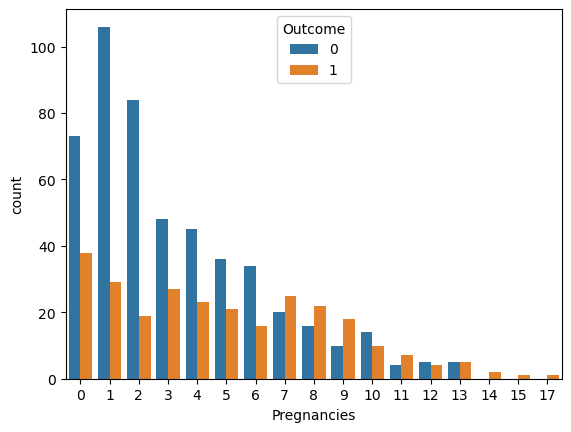

In [34]:
# 16) Write python code to get the below bar chart with the column Pregnancies and outcome? 
# pregancy_data=data.groupby(['Pregnancies','Outcome'])['Outcome'].count sns.barplot(data=pregancy_data,x='Pregnancies',y='count',hue='Outcome')
# pregancy_data=data.groupby(['Pregnancies','Outcome'])['Outcome'].count().reset_index(name="count") sns.barplot(data=pregancy_data,x='Pregnancies',y='count',hue='Outcome')
# pregancy_data=data.value_counts(['Pregnancies','Outcome'])['Outcome'].count().reset_index(name="count") sns.barplot(data=pregancy_data,x='Pregnancies',y='count',hue='Outcome')
# pregancy_data=data.groupby(['Pregnancies','Outcome']).count().reset_index(name="count") sns.barplot(data=pregancy_data,x='Pregnancies',y='count',hue='Outcome')

#a
pregnancy_data = dt.groupby(['Pregnancies', 'Outcome'])['Outcome'].count().reset_index(name="count")
sns.barplot(data=pregnancy_data, x='Pregnancies', y='count', hue='Outcome')
plt.show()

In [35]:
# 17) Which column has the highest entropy excluding the target column Outcome in the original data?
# BMI
# Insulin
# Pregnancies
# DiabetesPedigreeFunction

# Calculate entropy for each column
entropies = {col: calculate_entropy(dt[col]) for col in dt.columns if col != 'Outcome'}

# Find the column with the highest entropy
highest_entropy_column = max(entropies, key=entropies.get)
print(highest_entropy_column)


DiabetesPedigreeFunction


In [40]:
dt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 10 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
 9   BP_Category               768 non-null    object 
dtypes: float64(2), int64(7), object(1)
memory usage: 60.1+ KB


In [41]:
dt = dt.drop('BP_Category', axis=1)

In [42]:
# 18) Which column is considered as the root node of the decision tree using Information Gain in the original data?
# BMI
# BloodPressure
# Glucose
# DiabetesPedigreeFunction

from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split

# Assuming X contains features and y contains the target variable Outcome
X = dt.drop('Outcome', axis=1)
y = dt['Outcome']

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=24)

# Initialize and fit the Decision Tree model
model = DecisionTreeClassifier(random_state=8)
model.fit(X_train, y_train)

# Get feature importances
feature_importances = model.feature_importances_

# Find the column with the highest importance
root_node_column = X.columns[np.argmax(feature_importances)]
print(root_node_column)


Glucose


In [46]:
# 19) Provided the probability distribution is known, 
#  determine which column has the lowest gini index excluding the target column Outcome in the original data?
# Insulin
# BMI
# Pregnancies
# DiabetesPedigreeFunction

# Calculate Gini index for each column
gini_indices = {col: 1 - sum((dt[col] == value).mean() ** 2 for value in dt[col].unique()) for col in dt.columns if col != 'Outcome'}

# Find the column with the lowest Gini index
lowest_gini_column = min(gini_indices, key=gini_indices.get)
print(lowest_gini_column)

Insulin


In [ ]:
# 20) Consider we have built one decision tree and got AUC-ROC score as 0. Now the model predicts the outcome as 0 for one record, what will be the real outcome for that record?
# 0
# Can’t predict the real outcome.
# 0.5

# ANS 0

In [ ]:
# 21)  Remove the records with 0 Glucose. Filter the column Glucose having values less than and equal to 75. 
#Now whether the Glucose column with filtered values is considered as leaf node?
# FALSE
# TRUE

#ans  True

In [ ]:
# 22)  Independent features – Pregnancies & BloodPressure Dependent feature – 
#Outcome Split train and test with split size as 0.2 and random state as 24 Fit the model with random_state=8 and
#get accuracy with test data. Get the accuracy of 0.59090909. 
#Calculate the precision using the confusion matrix for the developed model?
# a 0.56
# b 0.41
# c 0.38
# d 0.74

In [ ]:
# 23)  Independent features – Insulin & BMI Dependent feature – Outcome Split train and test with split size as 0.2 and
#random state as 24 Fit the model with random_state=30 and get accuracy with test data. Get the accuracy of 0.6818181818. 
#Calculate the Recall using the confusion matrix for the developed model?
# a 0.5
# b 0.30
# c 0.28
# d 0.79  ans